In [1]:
import pandas as pd
import numpy as np
import os
import re

GENERAL_PATH = os.path.dirname(os.getcwd())

import sys
sys.path.append('..') 
from src.datasets.enhancedSeasonal_feature_extractor import EnhancedSeasonalColorDatabase
from src.datasets.resNeXt_feature_extractor import ResNeXtFeatureExtractor
#from src.datasets.enhancedSeasonal_feature_extractor import EnhancedSeasonalColorDatabase
from src.datasets.alexNet_feature_extractor import AlexNetFeatureExtractor

/home/martina/miniconda3/envs/env_investigacion/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


### Grafico features en 2 dimensiones

In [2]:
import matplotlib.pyplot as plt

def grafico_tsne(grouped_data, dataset, features):
    plt.figure(figsize=(8, 6))

    # Colores diferentes para cada grupo
    colors = plt.cm.get_cmap('viridis', len(grouped_data))

    # Iterar sobre los grupos y graficar cada uno con un color distinto
    for idx, (label, group) in enumerate(grouped_data.items()):
        group_features = np.array(group['features'])
        plt.scatter(group_features[:, 0], group_features[:, 1], label=label, color=colors(idx), alpha=0.6)

    # Títulos y etiquetas
    plt.title('t-SNE 2D Visualization with Season Labels')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

    # Agregar leyenda
    plt.legend(title="Season")
    plt.savefig(f'/home/martina/2025/investigacion/Proyecto_Estilismo/TSNE/graphs/tsne_{dataset}_{features}.png')

    # Mostrar el gráfico
    plt.show()

### Reduccion de features a 2 dimensiones con TSNE

In [ ]:
from sklearn.manifold import TSNE

def reduce_dim_tsne(features_dataset, labels):
    subset = features_dataset[:1000]
    labels_subset = labels[:1000]
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(subset)
    
    grouped_data = {}
    for i, label in enumerate(labels_subset):
        if label not in grouped_data:
            grouped_data[label] = {'features': [], 'indices': []}
        grouped_data[label]['features'].append(features_2d[i])
        grouped_data[label]['indices'].append(i)

    return grouped_data

### Extraer features de imagenes

In [4]:
def extract_features(name):
    df = pd.read_csv(GENERAL_PATH +f'/data/processed/SeasonsModel/{name}/train_SeasonsModel_{name}.csv')
    labels = df['season'].values

    df_filtered = df.drop(columns=['image_file', 'season'])
    return df_filtered, labels


def process_to_extract(dataset,type_features=0):
    if dataset == 'DeepArmocromia':
        train_path = GENERAL_PATH +f'/data/split_dataset/{dataset}/test_{dataset}.csv'
    else:
        train_path = GENERAL_PATH +f'/data/split_dataset/{dataset}/train_{dataset}.csv'
    
    if type_features == 0:
        extractor = EnhancedSeasonalColorDatabase()
        features_name = 'enhancedSeasonal'
        extractor_kwargs = {'full_path': '/home/martina/2025/investigacion/Proyecto_Estilismo/'} 

    elif type_features == 2:
        extractor = AlexNetFeatureExtractor()
        features_name = 'alexNet_compact'
        extractor_kwargs = {'compact': True, 'face_seg': False, 'full_path': '/home/martina/2025/investigacion/Proyecto_Estilismo/'}
        
    elif type_features == 5:
        extractor = ResNeXtFeatureExtractor()
        features_name = 'resNeXt_compact'
        extractor_kwargs = {'compact': True, 'full_path': '/home/martina/2025/investigacion/Proyecto_Estilismo/'}
    
    train_features_df = extractor.extract_imgs_features(train_path, **extractor_kwargs)
    return train_features_df.drop(columns=['image_file', 'season']), train_features_df['season'].values


## Seasons Model: Enhanced Seasonal features

/tmp/ipykernel_30469/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


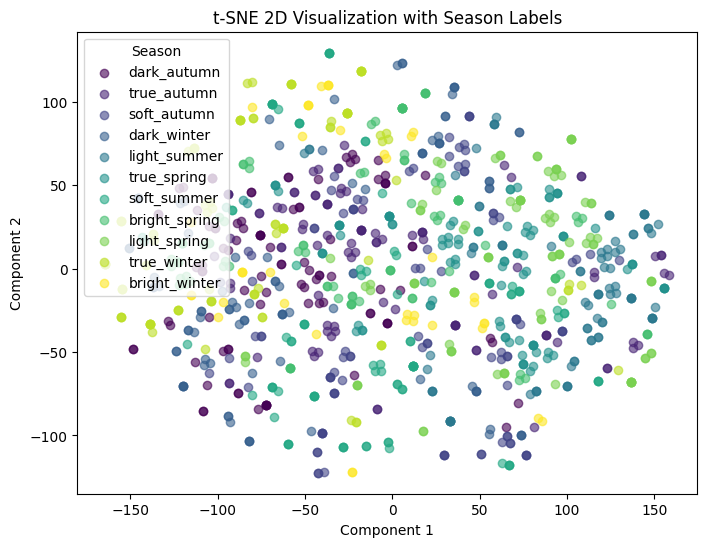

In [11]:
dataset = 'SeasonsModel'
features = 'enhancedSeasonal'
df, labels = extract_features(features)
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)

## Seasons Model: AlexNet features

/tmp/ipykernel_30469/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


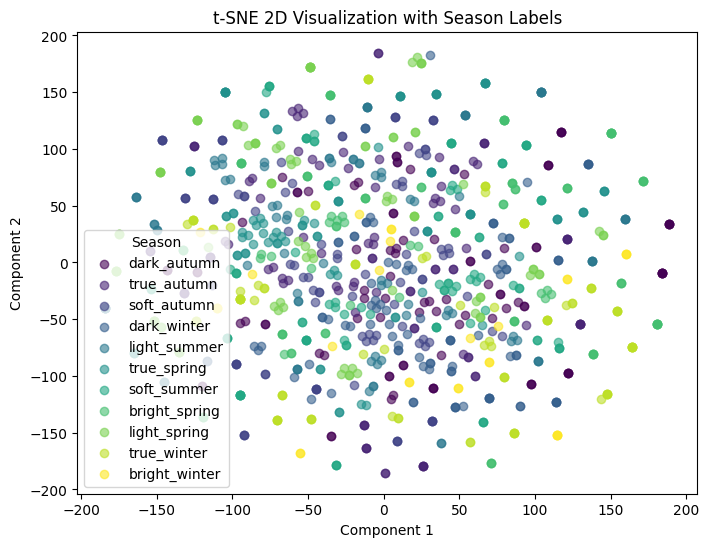

In [12]:
dataset = 'SeasonsModel'
features = 'alexNet'
df, labels = extract_features(features)
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)

## Seasons Model: AlexNet compact features

/tmp/ipykernel_30469/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


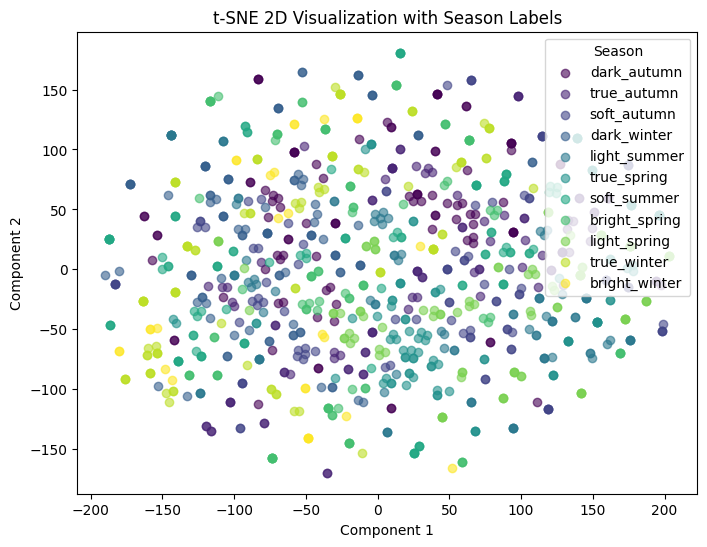

In [13]:
dataset = 'SeasonsModel'
features = 'alexNet_compact'
df, labels = extract_features(features)
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)

## Seasons Model: AlexNet compact face only features

/tmp/ipykernel_30469/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


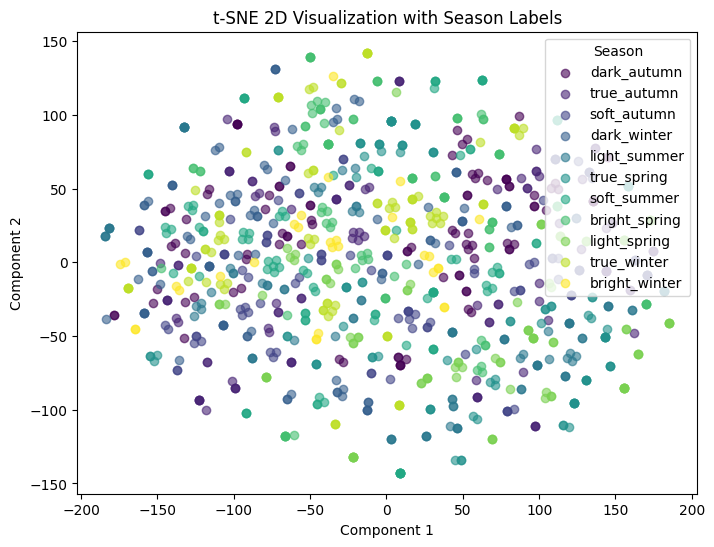

In [14]:
dataset = 'SeasonsModel'
features = 'alexNet_face_only_compact'
df, labels = extract_features(features)
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)

## Seasons Model: ResNeXt compact features

In [15]:
dataset = 'SeasonsModel'
features = 'resNeXt_compact'
df, labels = process_to_extract(dataset,type_features=5)

/home/martina/miniconda3/envs/env_investigacion/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/martina/miniconda3/envs/env_investigacion/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/tmp/ipykernel_30469/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


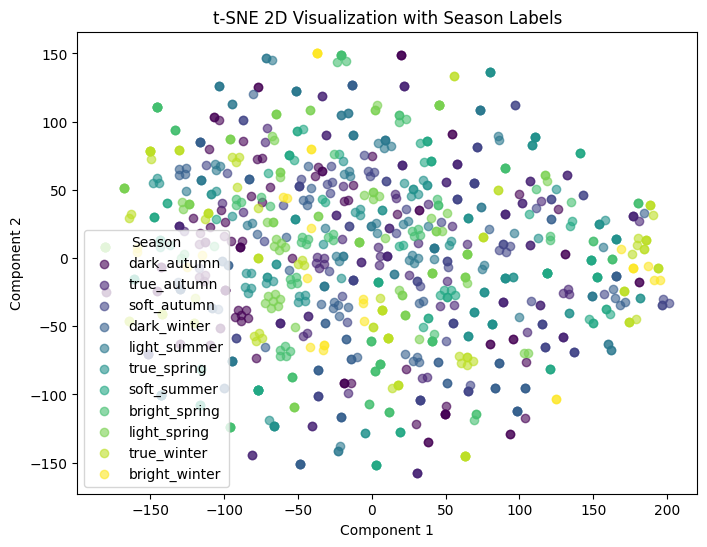

In [17]:
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)

## DeepArmocromia: Enhanced features

In [ ]:
dataset = 'DeepArmocromia'
features = 'enhanced'
df, labels = process_to_extract(dataset,type_features=0)

Creating enhanced database...
Looking for images in: /home/martina/2025/investigacion/Proyecto_Estilismo/data/split_dataset/DeepArmocromia/test_DeepArmocromia.csv
Processed data/raw/DeepArmocromia/test/spring/warm/18125.png
Processed data/raw/DeepArmocromia/test/spring/warm/20396.png
Processed data/raw/DeepArmocromia/test/spring/warm/52.png
Processed data/raw/DeepArmocromia/test/spring/warm/7270.png
Processed data/raw/DeepArmocromia/test/spring/warm/3767.png
Processed data/raw/DeepArmocromia/test/spring/warm/27206.png
Processed data/raw/DeepArmocromia/test/spring/warm/22571.png
Processed data/raw/DeepArmocromia/test/spring/warm/18341.png
Processed data/raw/DeepArmocromia/test/spring/warm/25947.png
Processed data/raw/DeepArmocromia/test/spring/warm/23328.png
Processed data/raw/DeepArmocromia/test/spring/warm/11676.png
Processed data/raw/DeepArmocromia/test/spring/warm/24625.png
Processed data/raw/DeepArmocromia/test/spring/warm/20028.png
Processed data/raw/DeepArmocromia/test/spring/war

/tmp/ipykernel_29692/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


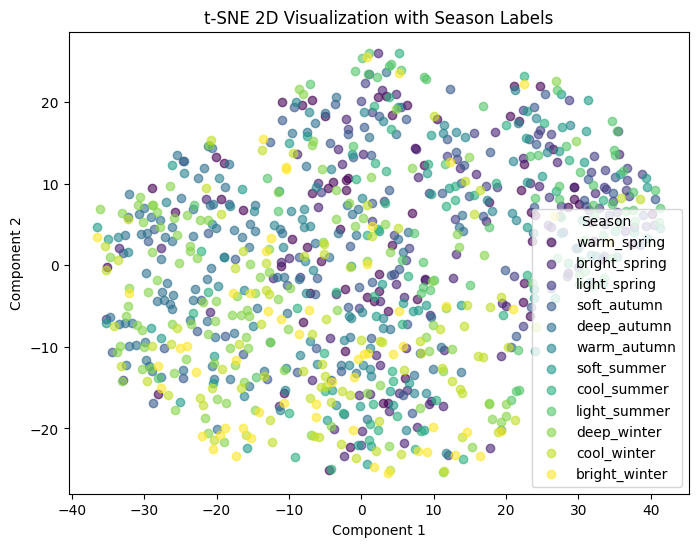

In [ ]:
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)

## DeepArmocromia: AlexNet compact features

In [ ]:
dataset = 'DeepArmocromia'
features = 'alexNet_compact'
df, labels = process_to_extract(dataset,type_features=2)

/home/martina/miniconda3/envs/env_investigacion/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/martina/miniconda3/envs/env_investigacion/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Creating alexNet database...
Looking for images in: /home/martina/2025/investigacion/Proyecto_Estilismo/data/split_dataset/DeepArmocromia/test_DeepArmocromia.csv
Processed data/raw/DeepArmocromia/test/spring/warm/18125.png
Processed data/raw/DeepArmocromia/test/spring/warm/20396.png
Processed data/raw/DeepArmocromia/test/spring/warm/52.png
Processed data/raw/DeepArmocromia/test/spring/warm/7270.png
Processed data/raw/DeepArmocromia/test/spring/warm/3767.png
Processed data/raw/DeepArmocromia/test/spring/warm/27206.png
Processed data/raw/DeepArmocromia/test/spring/warm/22571.png
Processed data/raw/DeepArmocromia/test/spring/warm/18341.png
Processed data/raw/DeepArmocromia/test/spring/warm/25947.png
Processed data/raw/DeepArmocromia/test/spring/warm/23328.png
Processed data/raw/DeepArmocromia/test/spring/warm/11676.png
Processed data/raw/DeepArmocromia/test/spring/warm/24625.png
Processed data/raw/DeepArmocromia/test/spring/warm/20028.png
Processed data/raw/DeepArmocromia/test/spring/warm

/tmp/ipykernel_30469/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


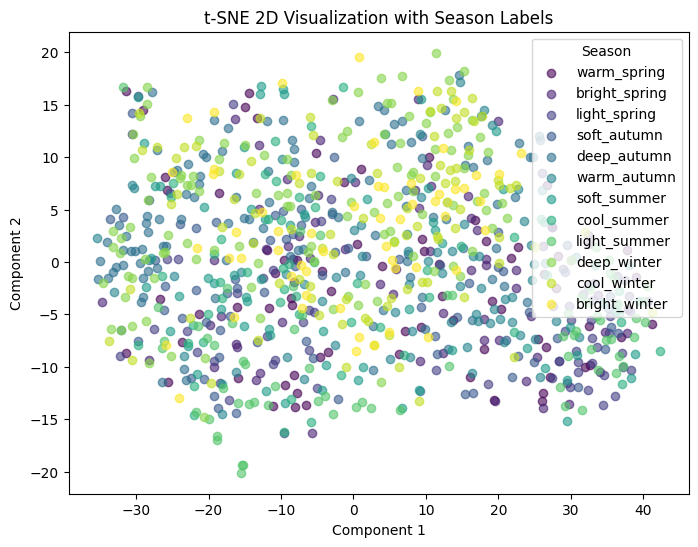

In [ ]:
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)

## DeepArmocromia: ResNeXt compact features

In [ ]:
dataset = 'DeepArmocromia'
features = 'resNeXt_compact'
df, labels = process_to_extract(dataset,type_features=5)

/home/martina/miniconda3/envs/env_investigacion/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/martina/miniconda3/envs/env_investigacion/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt101_32X8D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt101_32X8D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/tmp/ipykernel_30469/4132802830.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(grouped_data))


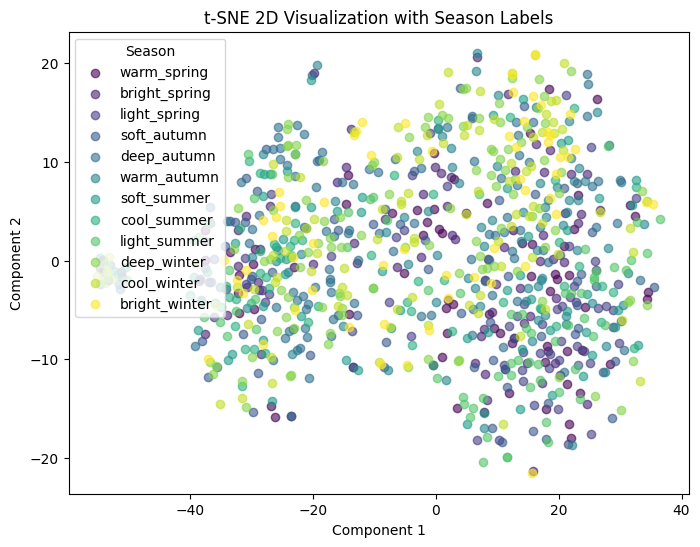

In [9]:
grouped = reduce_dim_tsne(df, labels)
grafico_tsne(grouped, dataset, features)